In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Projekat 1 - 20 bodova

**Rok za predaju je ponedeljak 12.04.2021 do kraja dana. Projekti se predaju slanjem na email (grakocevic@raf.rs)**.

U VCF fajlu su dati rezultati studije u kojoj su prikupljani podaci o mutacijama u određenoj populaciji (tabela sa imenom eksperimenta koji je dodeljen svakom studentu je data u fajlu Lista zadataka 2021). Osobe zahvaćene nekom bolešću su označene kao *case_x*, a zdrave osobe sa *control_x*.

Kao rezultat projekta se potrebno je predati:  
1. Kod kojim su generisani rezultati (ipynb ili python skripta)
2. Kraći izveštaj sa tekstualnim odgovorima na pitanja i grafikonima **u PDF formatu**  
  
Fajlove nazvati po šablonu: ime_prezime_III-GG_bix-1.ipynb/py i ime_prezime_III-GG_bix-1.pdf (pri čemu su III i GG broj indeksa i godina upisa).

---


Projekat je moguće raditi pojedinačno ili u paru. **Ukoliko se projekat radi u paru, svaki student treba da obradi podatke iz eksperimenta koji mu dodeljen, a rad u paru se odnosi na programski kod i šablon za tekstualni izveštaj.** Projekte rađene u paru predaje jedan od dva studenta, pri čemu je potrebno poslati 4 fajla (po jedan fajl sa kodom i jedan PDF izvestaj za svakoga), i tom prilikom onog drugog stavlja u CC. 

Pitanja:

1. [1 bod] Koliko je subjekata ukupno učestvovalo u studiji? Koliko njih su oboleli, a koliko zdravi?
 
2. [1 bod] Koliko je ukupno mutacija posmatrano u populaciji. Dati tabelu sa brojem mutacija po hromozomu.
   
3. [4 boda] Nacrtati sledeće histograme, pri čemu odvojeno prikazati podatke dobijene iz zdravih i obolelih pacijenata (po dva histograma na istom grafiku):  
  3a. [1 boda] Frekvencije ređih alela (minor allele frequency, MAF) za svaku mutaciju u studiji  
  3b. [1 boda] Procenat homozigotnih referentnih uzoraka za svaku mutacija u studiji  
  3c. [1 boda] Procenat homozigotnih alternativnih uzoraka za svaku mutacija u studiji  
  3d. [1 boda] Procenat heterozigotnih uzoraka za svaku mutacija u studiji     
      
4. [9 bodova] Identifikovati mutacije koje su statistički značajno asocirane sa datom bolešću (p manje od 0.05, upotrebom hi kvadrat testa).  
  4a. [3 boda] Primeniti hi kvadrat test na sve mutacije u studiji  
  4b. [2 boda] Da li je potrebno izvršiti korekciju za višestruko testiranje (odgovor dati napismeno)? Ukoliko jeste, objasniti kako, i primeniti je.  
  4c. [1 bod] Nacrtati Menhetn grafikon. Voditi računa da su ose adekvatno anotirane i da dužina duž X ose alocirana svakom hromozomu bude proporcionalna dužini hromozoma.  
  4d. [3 boda] Za svaku mutaciju koja je statistički značajno asocirana sa datom bolešću odrediti da li odstupa od Hardi-Vajnberg ekvilibrijuma (upotrebom hi kvadrat testa). Da li ima takcih mutacija? Da li je ovom prilikom potrebna korekcija za višestruko testiranje (obrazložiti)? 

5. [5 bodova] Na osnovu mutacije koja pokazuje najjaču asocijaciju sa bolešću odrediti region na referentnom genomu gde se verovatno nalazi gen koji uzrokuje bolest.  
  5a. [3 boda] Identifikovati jedan ili više mogućih gena upotrebom [UCSC Genome browsera](https://genome.ucsc.edu/cgi-bin/hgGateway?redirect=manual&source=genome.ucsc.edu). Studija je rađena prema GRCH37 referentnom genomu.   
  5b. [2 boda] Izvući podatke o bolestima vezanim za identifikovane gene sa [OMIM sajta](https://omim.org) (nije potrebno prevoditi na srpski jezik).  

In [2]:
!pip install qqman

In [3]:
!pip install pysam

     |████████████████████████████████| 9.9MB 5.3MB/s 


In [4]:
!pip install scipy

---

### 0. Import arhiva...


In [5]:
import pysam
from tabulate import tabulate
import matplotlib.pyplot as plt
 
vcf = pysam.VariantFile('/content/drive/MyDrive/experiment_45.vcf')


---

### 1. Koliko je subjekata ukupno učestvovalo u studiji? Koliko njih su oboleli, a koliko zdravi?

In [6]:
print(f'Ukupan broj ucesnika: {len(list(vcf.header.samples))}')

filtered = []
for o in list(vcf.header.samples):
  if o.startswith('control'):
    filtered.append(o)


print(f'Ukupan broj zdravih osoba: {len(filtered)}')

filtered = []
for o in list(vcf.header.samples):
  if o.startswith('case'):
    filtered.append(o)

print(f'Ukupan broj bolesnih osoba: {len(filtered)}')

Ukupan broj ucesnika: 200
Ukupan broj zdravih osoba: 100
Ukupan broj bolesnih osoba: 100


---

### 2. Koliko je ukupno mutacija posmatrano u populaciji. Dati tabelu sa brojem mutacija po hromozomu.

In [7]:
mutations = dict()
i = 0
chrom = 1
for variant in vcf.fetch():
    if int(variant.chrom) > chrom:
      mutations[chrom] = i
      i = 0
      chrom += 1
    i += 1
mutations[chrom] = i
# for key, value in mutations.items() :
#     print (key, value)
headers = {'Chromosome', 'Number of mutations'}
print(tabulate(mutations.items(), tablefmt="pretty", headers=headers))
print(f'Total number of mutations: {sum(mutations.values())}')


+------------+---------------------+
| Chromosome | Number of mutations |
+------------+---------------------+
|     1      |       102842        |
|     2      |       114870        |
|     3      |        92888        |
|     4      |        85336        |
|     5      |        86532        |
|     6      |        95476        |
|     7      |        74002        |
|     8      |        76756        |
|     9      |        65374        |
|     10     |        72903        |
|     11     |        67554        |
|     12     |        66884        |
|     13     |        56428        |
|     14     |        44790        |
|     15     |        38680        |
|     16     |        37876        |
|     17     |        30975        |
|     18     |        41882        |
|     19     |        19172        |
|     20     |        33382        |
|     21     |        18402        |
|     22     |        17819        |
+------------+---------------------+
Total number of mutations: 1340823


### 3.Nacrtati sledeće histograme, pri čemu odvojeno prikazati podatke dobijene iz zdravih i obolelih pacijenata (po dva histograma na istom grafiku):

### 3a. Frekvencije ređih alela (minor allele frequency, MAF) za svaku mutaciju u studiji

In [8]:
frequencies_ill = []
frequencies_healthy = []
for variant in vcf.fetch():
  ill_ref_count = 0
  ill_alt_count = 0
  healthy_ref_count = 0
  healthy_alt_count = 0
  for sample in variant.samples:
    if sample.startswith('case'):
      if variant.samples[sample]['GT'][0] == 0:
        ill_ref_count += 1
      elif variant.samples[sample]['GT'][0] == 1:
        ill_alt_count += 1
      if variant.samples[sample]['GT'][1] == 0:
        ill_ref_count += 1
      elif variant.samples[sample]['GT'][1] == 1:
        ill_alt_count += 1
      
    elif sample.startswith('control'):
      if variant.samples[sample]['GT'][0] == 0:
        healthy_ref_count += 1
      elif variant.samples[sample]['GT'][0] == 1:
        healthy_alt_count += 1
      if variant.samples[sample]['GT'][1] == 0:
        healthy_ref_count += 1
      elif variant.samples[sample]['GT'][1] == 1:
        healthy_alt_count += 1
  frequencies_ill.append(ill_ref_count/(ill_ref_count+ill_alt_count)) if ill_ref_count < ill_alt_count else frequencies_ill.append(ill_alt_count/(ill_ref_count+ill_alt_count))
  frequencies_healthy.append(healthy_ref_count/(healthy_ref_count+healthy_alt_count)) if healthy_ref_count < healthy_alt_count else frequencies_healthy.append(healthy_alt_count/(healthy_ref_count+healthy_alt_count))

    

Text(0.5, 1.0, 'MAF')

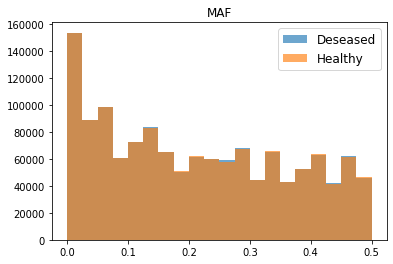

In [9]:
plt.hist(frequencies_ill, alpha=0.65, label='Deseased', bins=20)
plt.hist(frequencies_healthy, alpha=0.65, label='Healthy', bins=20)
plt.legend(prop={'size': 12})
plt.title('MAF')

In [10]:
frequencies_healthy_ref = []
frequencies_healthy_alt = []
frequencies_healthy_hetero = []
frequencies_ill_ref = []
frequencies_ill_alt = []
frequencies_ill_hetero = []
for variant in vcf.fetch():
  homo_ill_ref = 0
  homo_healthy_ref = 0
  homo_ill_alt = 0
  homo_healthy_alt = 0
  hetero_ill = 0
  hetero_healthy = 0
  for sample in variant.samples:
    if sample.startswith('case'):
      if variant.samples[sample]['GT'][0] == 0 and variant.samples[sample]['GT'][1] == 0:
        homo_ill_ref += 1
      elif variant.samples[sample]['GT'][0] != variant.samples[sample]['GT'][1]:
        hetero_ill += 1
      elif variant.samples[sample]['GT'][0] == 1 and variant.samples[sample]['GT'][1] == 1:
        homo_ill_alt += 1
    elif sample.startswith('control'):
      if variant.samples[sample]['GT'][0] == 0 and variant.samples[sample]['GT'][1] == 0:
        homo_healthy_ref += 1
      elif variant.samples[sample]['GT'][0] != variant.samples[sample]['GT'][1]:
        hetero_healthy += 1
      elif variant.samples[sample]['GT'][0] == 1 and variant.samples[sample]['GT'][1] == 1:
        homo_healthy_alt += 1
  sum_ill = homo_ill_ref + homo_ill_alt + hetero_ill
  sum_healthy = homo_healthy_ref + homo_healthy_alt + hetero_healthy
  
  frequencies_healthy_ref.append(homo_healthy_ref/sum_healthy)
  frequencies_healthy_alt.append(homo_healthy_alt/sum_healthy)
  frequencies_healthy_hetero.append(hetero_healthy/sum_healthy)
  
  frequencies_ill_ref.append(homo_ill_ref/sum_ill)
  frequencies_ill_alt.append(homo_ill_alt/sum_ill)
  frequencies_ill_hetero.append(hetero_ill/sum_ill)


### 3b. Procenat homozigotnih referentnih uzoraka za svaku mutaciju u studiji



Text(0.5, 1.0, 'Homozygous ref percentage')

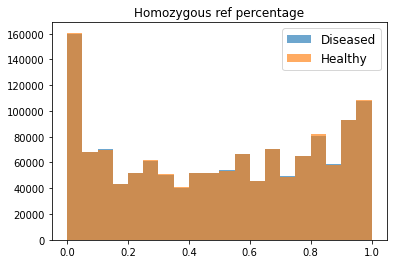

In [11]:
plt.hist(frequencies_ill_ref, alpha=0.65, label='Diseased', bins=20)
plt.hist(frequencies_healthy_ref, alpha=0.65, label='Healthy', bins=20)
plt.legend(prop={'size': 12})
plt.title('Homozygous ref percentage')

### 3c. Procenat homozigotnih alternativnih uzoraka za svaku mutaciju u studiji

Text(0.5, 1.0, 'Homozygous alt percentage')

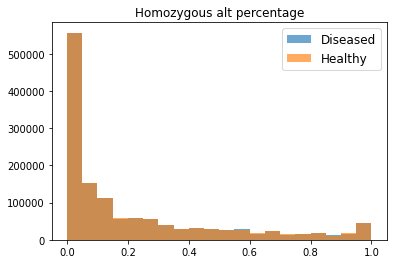

In [12]:
plt.hist(frequencies_ill_alt, alpha=0.65, label='Diseased', bins=20)
plt.hist(frequencies_healthy_alt, alpha=0.65, label='Healthy', bins=20)
plt.legend(prop={'size': 12})
plt.title('Homozygous alt percentage')

### 3d. Procenat heterozigotnih uzoraka za svaku mutaciju u studiji

Text(0.5, 1.0, 'Heterozygous percentage')

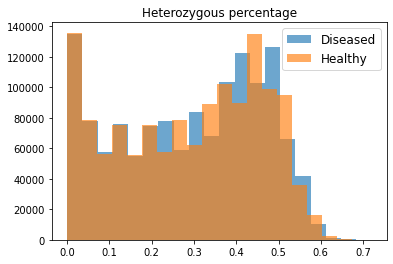

In [13]:
plt.hist(frequencies_ill_hetero, alpha=0.65, label='Diseased', bins=20)
plt.hist(frequencies_healthy_hetero, alpha=0.65, label='Healthy', bins=20)
plt.legend(prop={'size': 12})
plt.title('Heterozygous percentage')

### 4. Identifikovati mutacije koje su statistički značajno asocirane sa datom bolešću (p manje od 0.05, upotrebom hi kvadrat testa).

### 4a. Primeniti hi kvadrat test na sve mutacije u studiji

In [14]:
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

plist = []
for variant in vcf.fetch():
  num_zero_healthy = 0
  num_one_healthy = 0
  num_zero_ill = 0
  num_one_ill = 0
  for sample in variant.samples:
    if sample.startswith('case'):
      for i in range(2):
        if variant.samples[sample]['GT'][i] == 0:
          num_zero_ill += 1
        elif variant.samples[sample]['GT'][i] == 1:
          num_one_ill += 1
    elif sample.startswith('control'):
      for i in range(2):
        if variant.samples[sample]['GT'][i] == 0:
          num_zero_healthy += 1
        elif variant.samples[sample]['GT'][i] == 1:
          num_one_healthy += 1
  observations = [[num_zero_healthy, num_one_healthy], [num_zero_ill, num_one_ill]]
  # observations = [[num_zero_healthy, num_zero_ill], [num_one_healthy, num_one_ill]]
  p = 0
  if 0 in (num_one_healthy, num_one_ill, num_zero_healthy, num_zero_ill):
    p = fisher_exact(observations)[1]
  else:
    p = chi2_contingency(observations, correction=False)[1]

  plist.append([variant.chrom, variant.pos, p])




In [15]:
# Ispis problematicne mutacije
impps = []
i=0
for p in plist:
  if p[2] <= 0.05/sum(mutations.values()):
    print(p)
    impps.append(p)
    i += 1
print(i)

['9', 35749845, 6.080356967693687e-13]
1


### 4b. Da li je potrebno izvršiti korekciju za višestruko testiranje (odgovor dati napismeno)? Ukoliko jeste, objasniti kako, i primeniti je.

**Jeste, zbog toga što kada radimo sa velikom količinom podataka, može se desiti da veliki broj mutacija budu u prihvatajućoj p vrednosti (0.05).
Zbog toga primenjujemo Bonferoni korekciju, tako što 0.05 podelimo sa ukupnim brojem mutacija, i tada pomeramo granicu zadovoljavajućih p vrednosti.**





### 4c. Nacrtati Menhetn grafikon. Voditi računa da su ose adekvatno anotirane i da dužina duž X ose alocirana svakom hromozomu bude proporcionalna dužini hromozoma.

[WARNING]: Column 'SNP' not found!


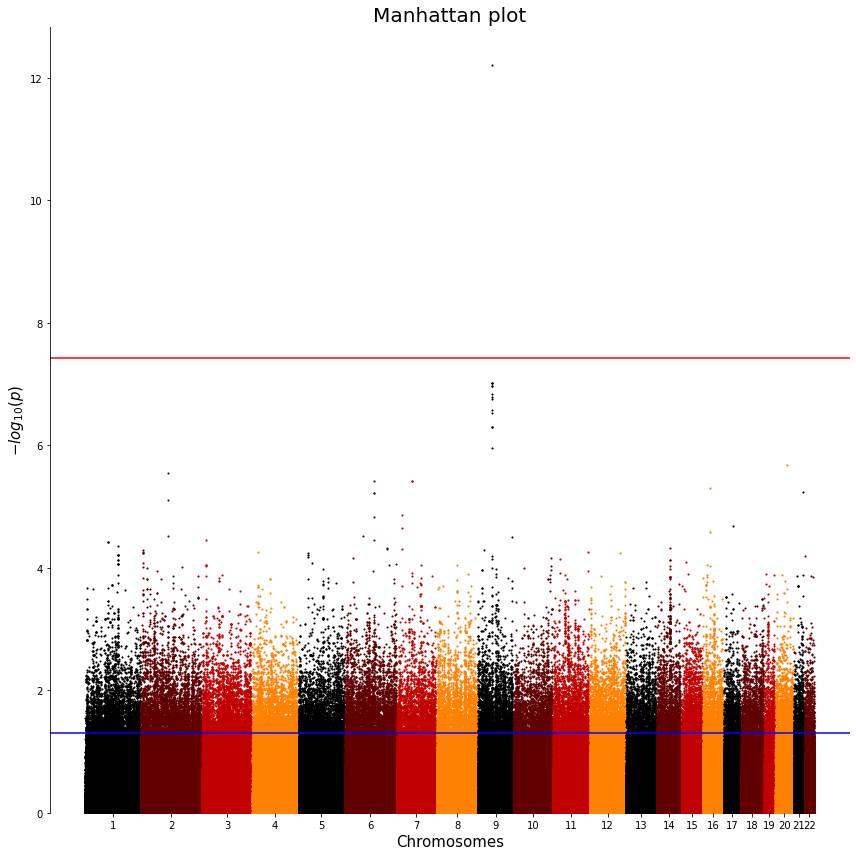

In [16]:
import math
from qqman import qqman
import pandas
import numpy as np

manhattan_list = []
for p in plist:
  tmp = []
  tmp.append(int(p[0]))
  tmp.append(p[1])
  tmp.append(p[2])
  manhattan_list.append(tmp)

df = pandas.DataFrame(manhattan_list, columns = ['CHR', 'BP', 'P'])
summ = sum(mutations.values())

qqman.manhattan(df, title = 'Manhattan plot', show=True, cmap=plt.get_cmap("gist_heat"), cmap_var=4, suggestiveline=-math.log(0.05, 10), genomewideline=-math.log(0.05/summ ,10))


### 4d. Za svaku mutaciju koja je statistički značajno asocirana sa datom bolešću odrediti da li odstupa od Hardi-Vajnberg ekvilibrijuma (upotrebom hi kvadrat testa). Da li ima takvih mutacija? Da li je ovom prilikom potrebna korekcija za višestruko testiranje (obrazložiti)?

In [20]:
import scipy

for variant in vcf.fetch():
  num_zero = 0
  num_one = 0
  homo_healthy_ref = 0
  hetero_healthy = 0
  homo_healthy_alt = 0
  for imp in impps:
    if variant.chrom == imp[0] and variant.pos == imp[1]:
      for sample in variant.samples:
        for i in range(2):
          if variant.samples[sample]['GT'][i] == 0:
            num_zero += 1
          elif variant.samples[sample]['GT'][i] == 1:
            num_one += 1
        if variant.samples[sample]['GT'][0] == 0 and variant.samples[sample]['GT'][1] == 0:
          homo_healthy_ref += 1
        elif variant.samples[sample]['GT'][0] != variant.samples[sample]['GT'][1]:
          hetero_healthy += 1
        elif variant.samples[sample]['GT'][0] == 1 and variant.samples[sample]['GT'][1] == 1:
          homo_healthy_alt += 1
    
      p = num_zero/(num_zero+num_one)
      q = num_one/(num_zero+num_one)
      expected = [p**2, 2*p*q, q**2]
      summ = homo_healthy_ref + homo_healthy_alt + hetero_healthy
      
      observations = [homo_healthy_ref/summ, hetero_healthy/summ, homo_healthy_alt/summ]
      pval = scipy.stats.chisquare(observations, expected, ddof=0)[1]
      if(pval >= 0.05):
        print('yes')
        print(pval)
      else:
        print('no')
        print(pval)




yes
0.9835412651281092


In [1]:
# !head -8000 /content/drive/MyDrive/experiment_45.vcf